# 역전파

In [1]:
import torch

In [3]:
x = torch.ones(2,2, requires_grad=True)
y = x+1
z = 2*y**2

r = z.mean()

print("result : ", r)

result :  tensor(8., grad_fn=<MeanBackward0>)


In [4]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


## 자동미분 선형회귀

In [5]:
import torch

from matplotlib import pyplot as plt
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]

In [11]:
w = torch.randn(num_features,1,requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [12]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b],lr=learning_rate)

In [13]:
loss_stack = []
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = torch.matmul(x,w)+b
    loss = torch.mean((y_hat - y)**2)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch %100 == 0:
        print(f"Epoch {epoch} : {loss.item()}")

Epoch 0 : 21.371591567993164
Epoch 100 : 1.5168612003326416
Epoch 200 : 0.1772155612707138
Epoch 300 : 0.08384641259908676
Epoch 400 : 0.07470168173313141
Epoch 500 : 0.07154644280672073
Epoch 600 : 0.06908013671636581
Epoch 700 : 0.06691388040781021
Epoch 800 : 0.06499291956424713
Epoch 900 : 0.06328834593296051
Epoch 1000 : 0.06177554279565811


In [14]:
with torch.no_grad():
    y_hat = torch.matmul(x,w)+b

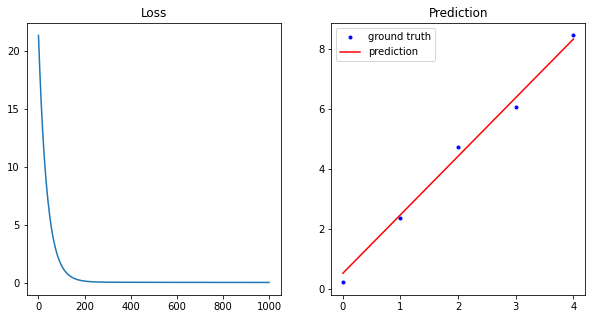

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()